# KerasでMNISTを使う時の基本操作

+ ### データを用意する
+ ### モデルを構築する
+ ### モデルを評価する

In [ ]:
%matplotlib inline

import os

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データを用意する

Kerasから直接使用できるデータセットの一覧はこちら( https://keras.io/ja/datasets/ )です。

In [ ]:
#Fashion MNISTのデータをロードする。
from tensorflow.keras.datasets import fashion_mnist
#xが入力、yが出力、trainが訓練用、testがテスト用
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


データセットが読み込めているか確認してみましょう。

Fashion-MNIST は60,000枚の28x28，10個のファッションカテゴリの白黒画像と10,000枚のテスト用画像データセットです。

|ラベル|説明|
|:---:|:---:|
|0|	Tシャツ/トップス|
|1|	ズボン|
|2|	プルオーバー|
|3|	ドレス|
|4|	コート|
|5|	サンダル|
|6|	シャツ|
|7|	スニーカー|
|8|	バッグ|
|9|	アンクルブーツ|

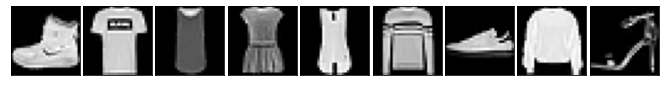

In [ ]:
#データセット表示
#先頭の`%matplotlib inline`はJupyterでグラフを表現する際に記述するものです。
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

#データの前処理

画像は、RGBの3色256段階の組み合わせで作られています。そのため、データサイエンスで画像を扱う時はその数値を正則化。つまり0∼1の幅に変化させます。

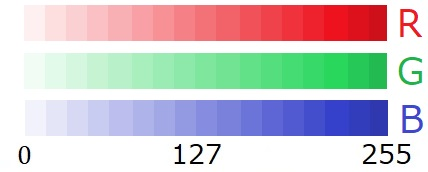


## 正規化が必要な理由

身長と体重のデータを使う時、身長は$160$であり、体重は$60$などデータのとりうる範囲が異なる場合がある。そのためデータのもとの数値のまま使うと数値の大きいクラスのデータが最も結果に影響を与えてしまう。

そこで、すべてのデータを平均0分散1に整えることで、結果に影響を与える変数を正しく認識できるようになる。よって、画像データも0~255のスケールをスケーリングすることで精度を良くする。

In [ ]:
# データの整形
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) /255

# 出力結果をone-hot表現に変換します。
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

one-hot表現とは、ラベルに対応する番号だけが1でそれ以外が0であるベクトルです。

一般化すると、全体で$K$クラスある時、$k$番目のクラスに属する場合、

$$\underset{K}{\underbrace{[0,\cdots,0,\overset{k}{\check{1}},0,\cdots,0]}}$$

# モデルを構築する

In [ ]:
#モデルの構築
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

#Sequential():層を直列につなぐシンプルなモデル
model = Sequential()

#モデルは追加された順と逆の順番で動作する
#np.shapeはtapple型で表記され、tppleでは、要素が一つの時、(x,)と書かなくてはいけない
model.add(Dense(units=256, input_shape=(784,))) # 次元の変化: 784 -> 256
model.add(Activation('relu'))
model.add(Dense(units=100)) # 次元の変化: 256 -> 100
model.add(Activation('relu'))
model.add(Dense(units=10)) # 次元の変化: 100 -> 10
model.add(Activation('softmax'))

model.compile(
    loss="categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

### 全結合
```py
keras.layers.core.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',
                        kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
                        kernel_constraint=None, bias_constraint=None)
```

* units: 出力ユニット数($N$)
* activation: 出力ユニットに適用する活性化関数、Activationレイヤーの説明を参照
* use_bias: バイアス$b$を使用するか
* kernel_initializer: 重み行列$W$の初期化方法（initializerについては3章で扱います）
* bias_initializer: バイアス$b$の初期化方法（initializerについては3章で扱います）

です。またshapeの入出力での変化は

<ol>(batch_size, ..., input_dim) --> (batch_size, ..., units)</ol>

のとおり、一番深いネストの次元がinput_dimからunitsに変わるだけです。


### 訓練課程の設定 
`compile(self, optimizer, loss, metrics=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)`

- **optimizer**:  最適化手法

- **loss**: 損失関数/目的関数．

- **metrics**: 評価関数

＜以下あんまり使わないもの＞

sample_weight_mode, weighted_metrics, target_tensors

https://keras.io/ja/models/sequential/

In [ ]:
#学習
history = model.fit(x_train, y_train,
            batch_size=1000, epochs=10, verbose=1,
            validation_data=(x_test, y_test))

Epoch 1/10
60/60 [==============================] - 1s 24ms/step - loss: 0.5325 - accuracy: 0.8207 - val_loss: 0.5510 - val_accuracy: 0.8099
Epoch 2/10
60/60 [==============================] - 1s 23ms/step - loss: 0.5265 - accuracy: 0.8220 - val_loss: 0.5463 - val_accuracy: 0.8128
Epoch 3/10
60/60 [==============================] - 1s 23ms/step - loss: 0.5212 - accuracy: 0.8237 - val_loss: 0.5411 - val_accuracy: 0.8142
Epoch 4/10
60/60 [==============================] - 1s 24ms/step - loss: 0.5160 - accuracy: 0.8248 - val_loss: 0.5369 - val_accuracy: 0.8156
Epoch 5/10
60/60 [==============================] - 1s 23ms/step - loss: 0.5113 - accuracy: 0.8273 - val_loss: 0.5321 - val_accuracy: 0.8162
Epoch 6/10
60/60 [==============================] - 1s 23ms/step - loss: 0.5070 - accuracy: 0.8274 - val_loss: 0.5275 - val_accuracy: 0.8171
Epoch 7/10
60/60 [==============================] - 1s 23ms/step - loss: 0.5026 - accuracy: 0.8291 - val_loss: 0.5244 - val_accuracy: 0.8182
Epoch 8/10
60

### モデルとデータの適用
`fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)
`
* x：学習に使用する入力データ
* y：学習に使用する出力データ
* batch_size：学習中のパラメータ更新を1回行うにあたって用いるサンプル数（ミニバッチのサイズ）
* epochs：学習のエポック数
* verbose：学習のログを出力するか（0:しない、1：バーで出力、2:エポックごとに出力）
* validation_split/validation_data：検証用に用いるデータの割合（0～１の実数）、または検証用データそのもの（いずれかのみ指定可能）
* shuffle：各エポックごとにデータをシャッフルするか
* callbacks：訓練中のモデルの挙動を監視できるcallback関数を指定できます

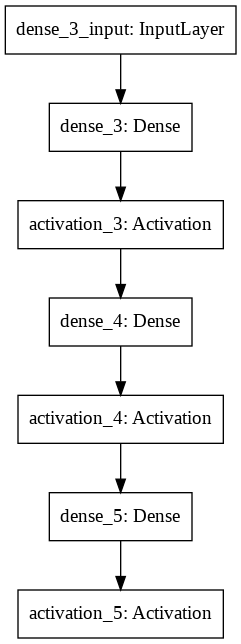

In [ ]:
# モデル構造の可視化
tf.keras.utils.plot_model(model)

# モデルを評価する

In [ ]:
#性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss", score[0])
print("Test accuracy", score[1])

#モデルの構造が確認できる
model.summary()

Test loss 0.5138868689537048
Test accuracy 0.8216000199317932
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25700     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 227,670
Trainable params: 227,670
Non-traina

`evaluate(self, x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None)`

* x：評価に使用する入力データ
* y：評価に使用する出力データ
* batch_size：1回の評価を行うにあたって用いるサンプル数
* verbose：評価のログを出力するか（0:しない、1：する(デフォルト)）


In [ ]:
# Pandas 形式
result = pd.DataFrame(history.history)
result.head()

,loss,accuracy,val_loss,val_accuracy
0,0.532508,0.820733,0.551035,0.8099
1,0.526521,0.822017,0.546272,0.8128
2,0.521231,0.823733,0.541130,0.8142
3,0.515992,0.824767,0.536874,0.8156
4,0.511287,0.827267,0.532063,0.8162


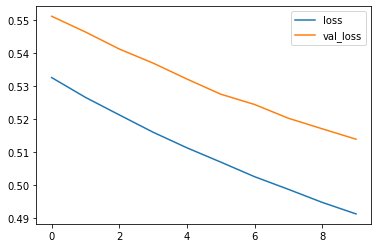

In [ ]:
# 目的関数の値
result[['loss', 'val_loss']].plot()

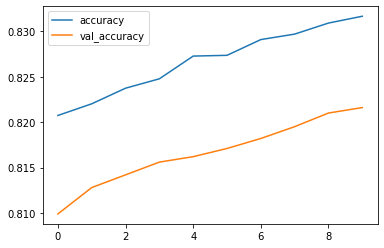

In [ ]:
# 正解率
result[['accuracy', 'val_accuracy']].plot();